In [1]:
import math
import random
import pickle
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("./drive/My Drive/Colab_Notebooks/koko/0_dataset1/"))
import time
import h5py
import glob

In [2]:
def plot_segment(segment):    
    plt.plot(segment[0], 'b')
    plt.plot(segment[1], 'g')
    plt.plot(segment[2], 'r')
    plt.plot(segment[3], 'c')
    plt.show()

def plot_case_segments(case_data, augmented=False): #(15, 4, 20000)
    row, col = 5, 2
    f, ax = plt.subplots(row, col, figsize=(18,22), dpi=300)
    segments = row * col
    if augmented:
        for i, seg in enumerate(range(segments)): 
            #print(i, seg)
            ax[i//col, i%col].plot(case_data[seg][0], 'b')
            ax[i//col, i%col].plot(case_data[seg][1], 'g')
            ax[i//col, i%col].plot(case_data[seg][2], 'r')  
            ax[i//col, i%col].plot(case_data[seg][3], 'c')  
            ax[i//col, i%col].axis('on')
            ax[i//col, i%col].set_title(f"segment: {seg+1}")
            f.tight_layout()
        plt.show()
    else:
        for i, seg in enumerate(range(segments)): 
            ax[i//col, i%col].plot(case_data[seg][0], 'b')
            ax[i//col, i%col].set_title(f"segment: {seg+1}")
            f.tight_layout()
        plt.show()

In [3]:
BASE = os.getcwd()
BASE

'/Users/kasikritdamkliang/Dropbox/DeepLearning/ECG-Analysis'

# Read .npy for X, y

In [4]:
data_dir = '/Users/kasikritdamkliang/GitHub/ECG-Analysis/dataset/'

data_dir = 'dataset/'

In [5]:
dataset_remark = 'age_1'

X = np.load(open(os.path.join(data_dir, 'X_train_age_1.npy'), 'rb'))
y = np.load(open(os.path.join(data_dir, 'y_train_age_1.npy'), 'rb'))

X.shape, y.shape

((5695, 4, 4000), (5695, 1))

In [6]:
df = pd.DataFrame(y)
df.sample(5)

0
4846  1.0
2760  1.0
0     0.0
5599  1.0
1283  0.0

In [7]:
def plot_count(df, feature, title='', size=2):        
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size), dpi=120)
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 1,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

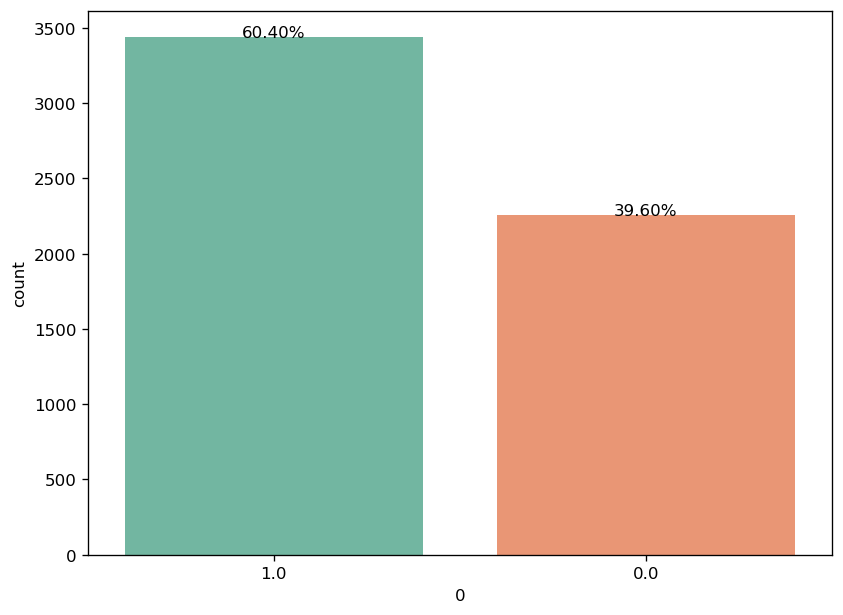

In [8]:
plot_count(df=df, feature=0)

In [9]:
from keras.utils import to_categorical
y = to_categorical(y)
y.shape

(5695, 2)

In [10]:
segment = X[:10]
segment.shape

(10, 4, 4000)

In [11]:
segment[0][0].shape

(4000,)

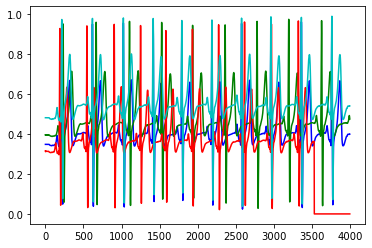

In [12]:
plot_segment(segment[0])

In [13]:
from scipy.signal import resample
freq = 400
segment_size = 10 #seconds
segment_lenth = freq * segment_size
def stretch(x):
    l = int(segment_lenth * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < segment_lenth:
        y_ = np.zeros(shape=(segment_lenth, ))
        y_[:l] = y
    else:
        y_ = y[:segment_lenth]
    return y_

def amplify(x):
    alpha = (random.random()-0.4)
    factor = -alpha*x + (1+alpha)
    return x*factor

In [14]:
(random.random()-0.5)/3

0.14550794362574448

In [15]:
random.random()

0.9409747313265078

In [22]:
X[100][0].shape

(4000,)

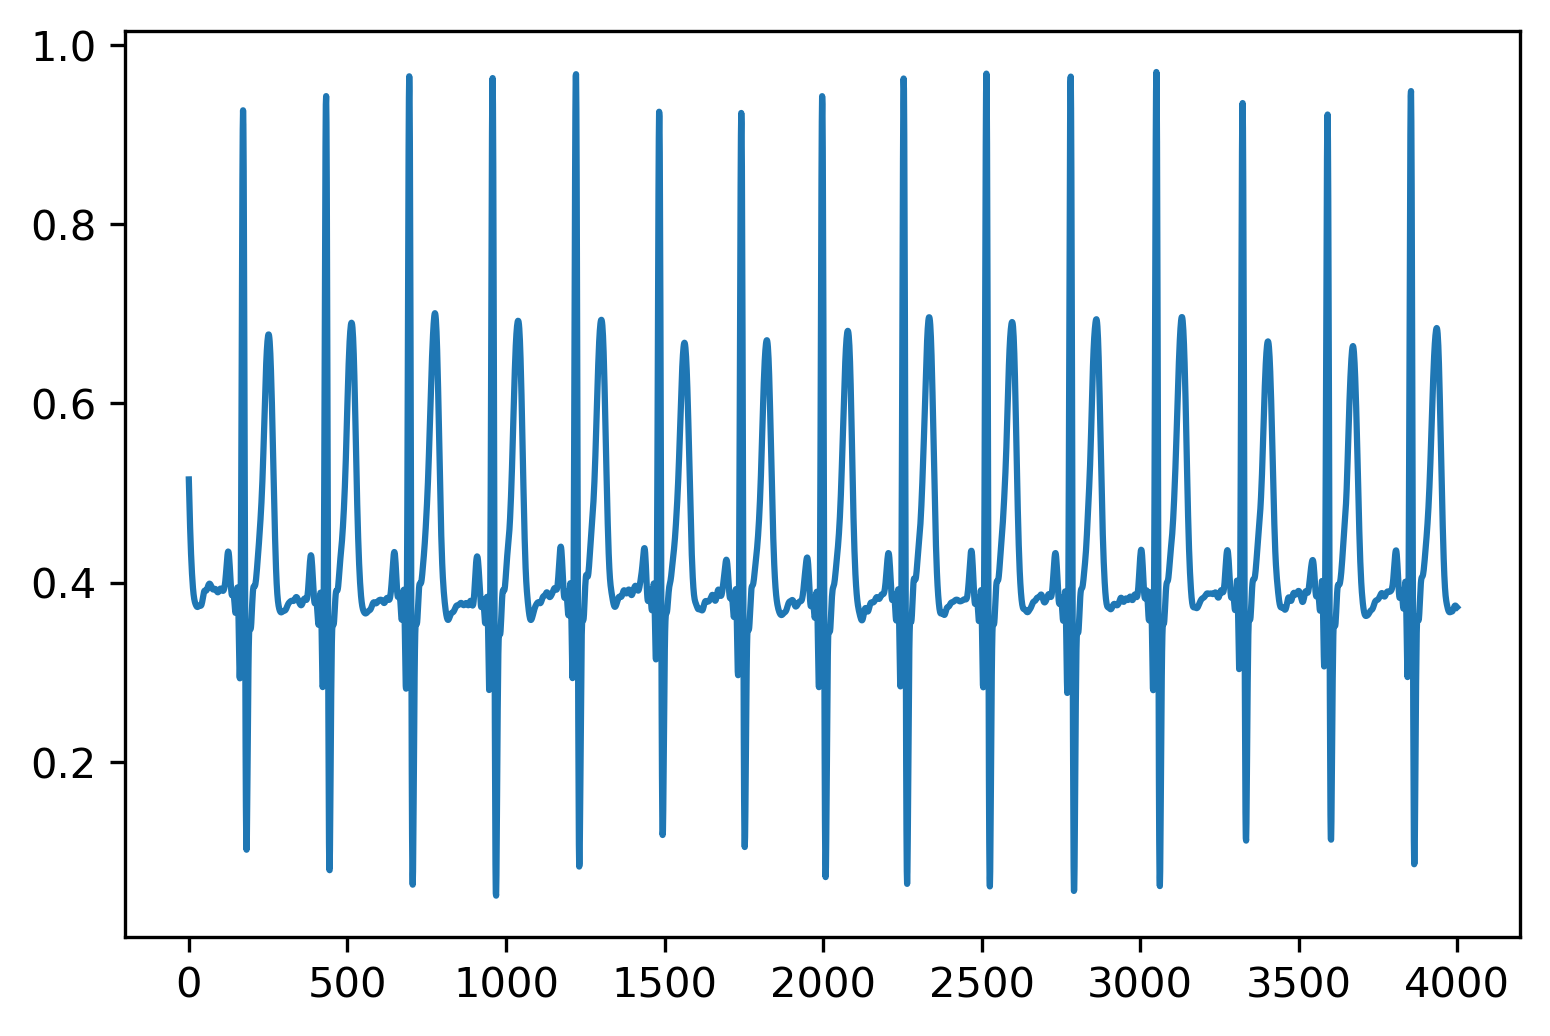

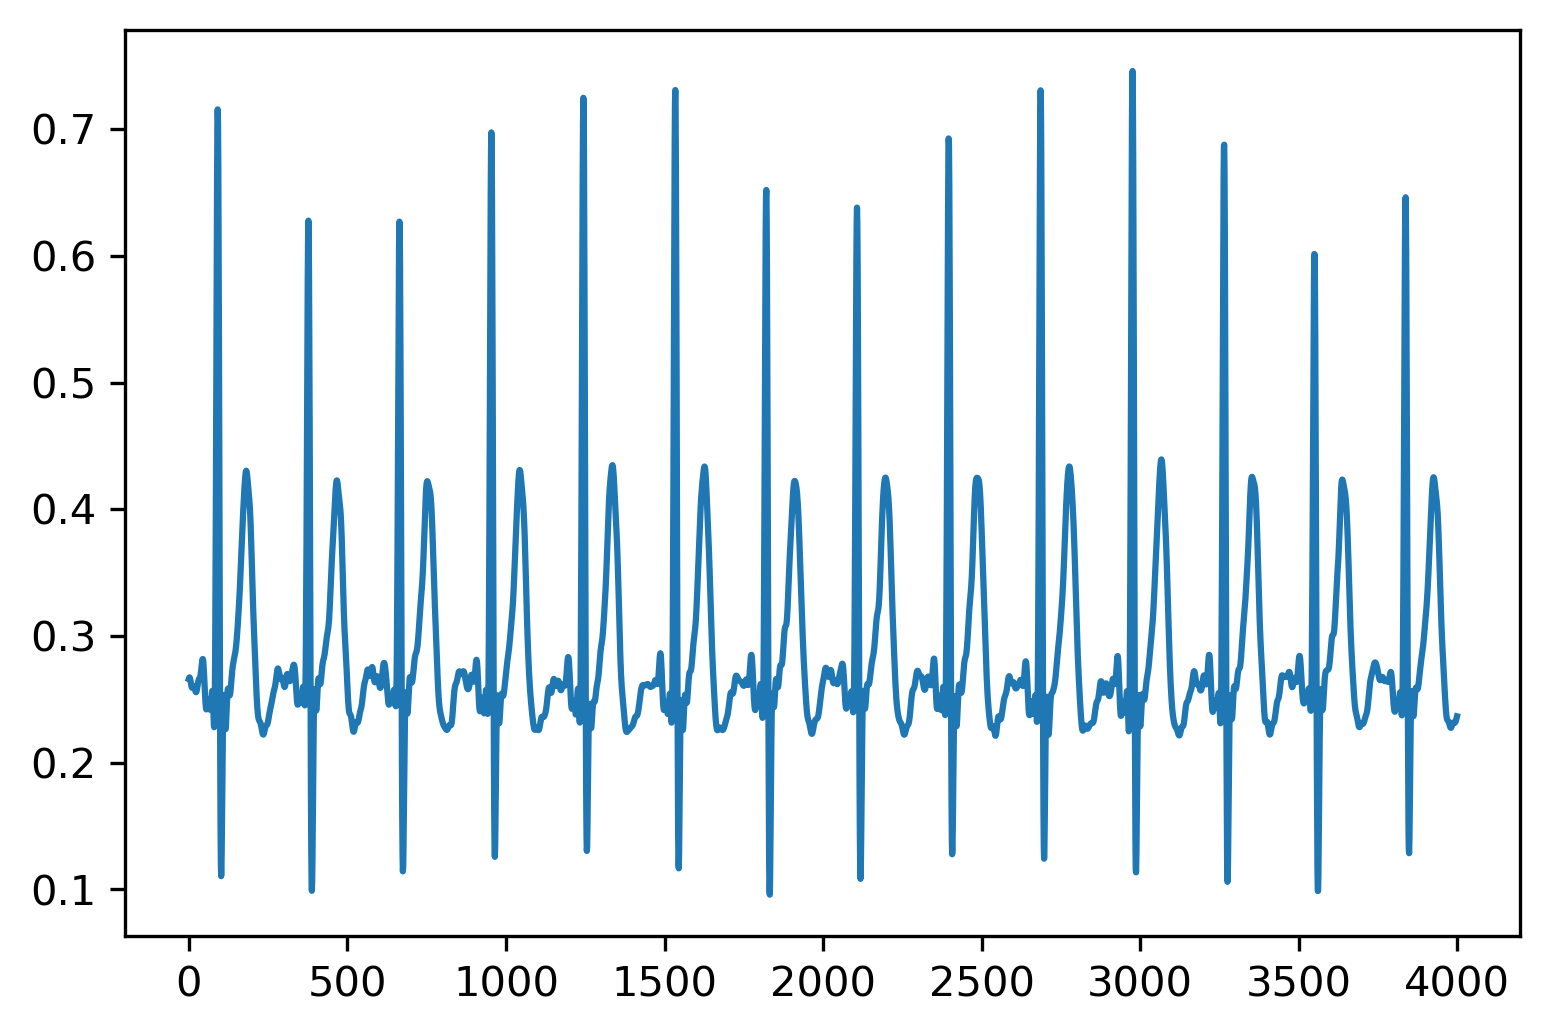

In [27]:
plt.figure(dpi=300)
plt.plot(X[100][0])
plt.figure(dpi=300)
plt.plot(X[400][0])
plt.show()

In [16]:
original_seg = segment[0][0]
s_seg = stretch(original_seg)
a_seg = amplify(original_seg)
combine_seg = amplify(s_seg)

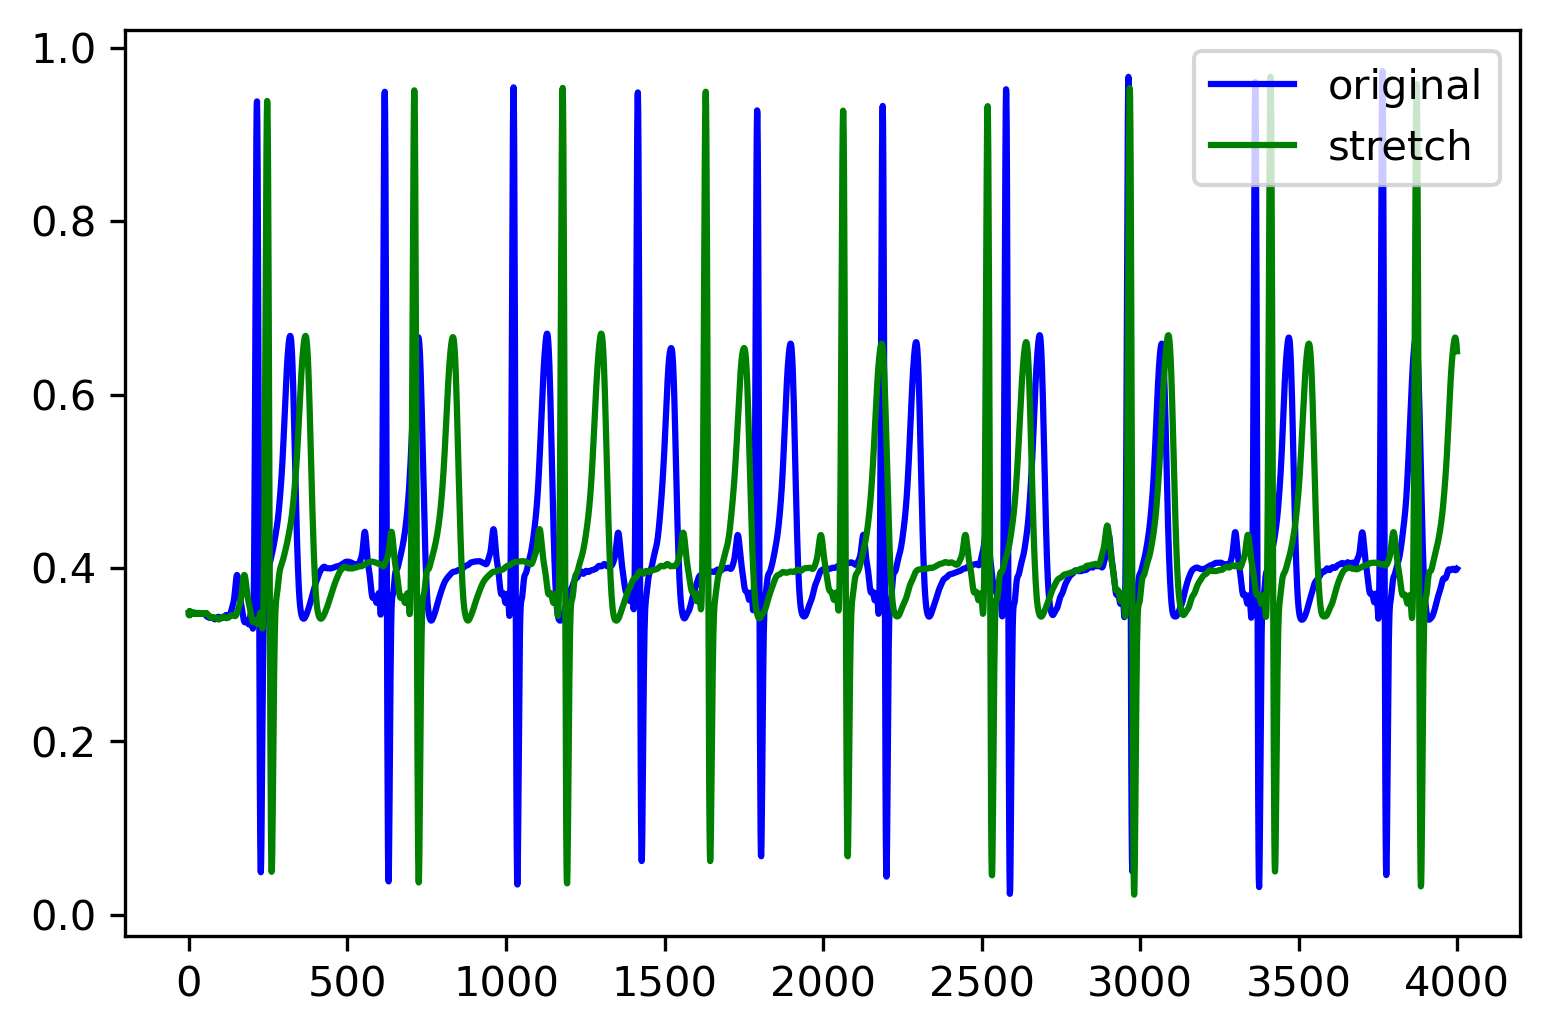

In [52]:
plt.figure(dpi=300)
plt.plot(original_seg, 'b')
plt.plot(s_seg, 'g')
plt.legend(['original',
           'stretch'],
           loc="upper right"
            )
plt.show()

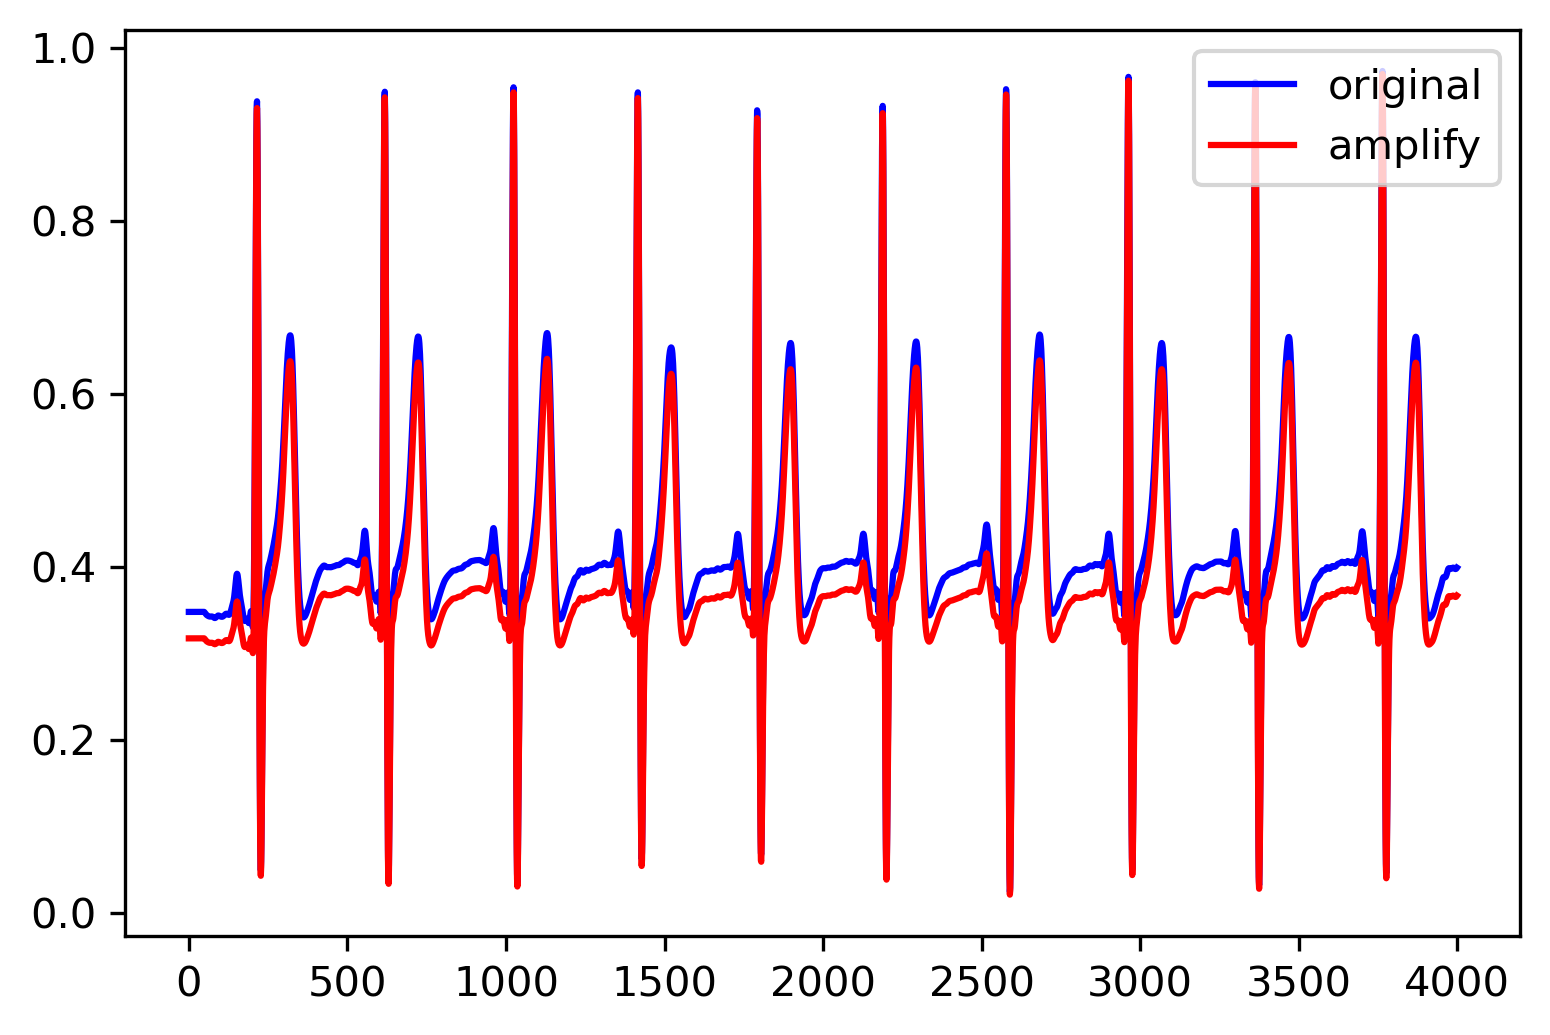

In [54]:
plt.figure(dpi=300)
plt.plot(original_seg, 'b')
plt.plot(a_seg, 'r')
plt.legend(['original',
           'amplify'],
           loc="upper right")
plt.show()

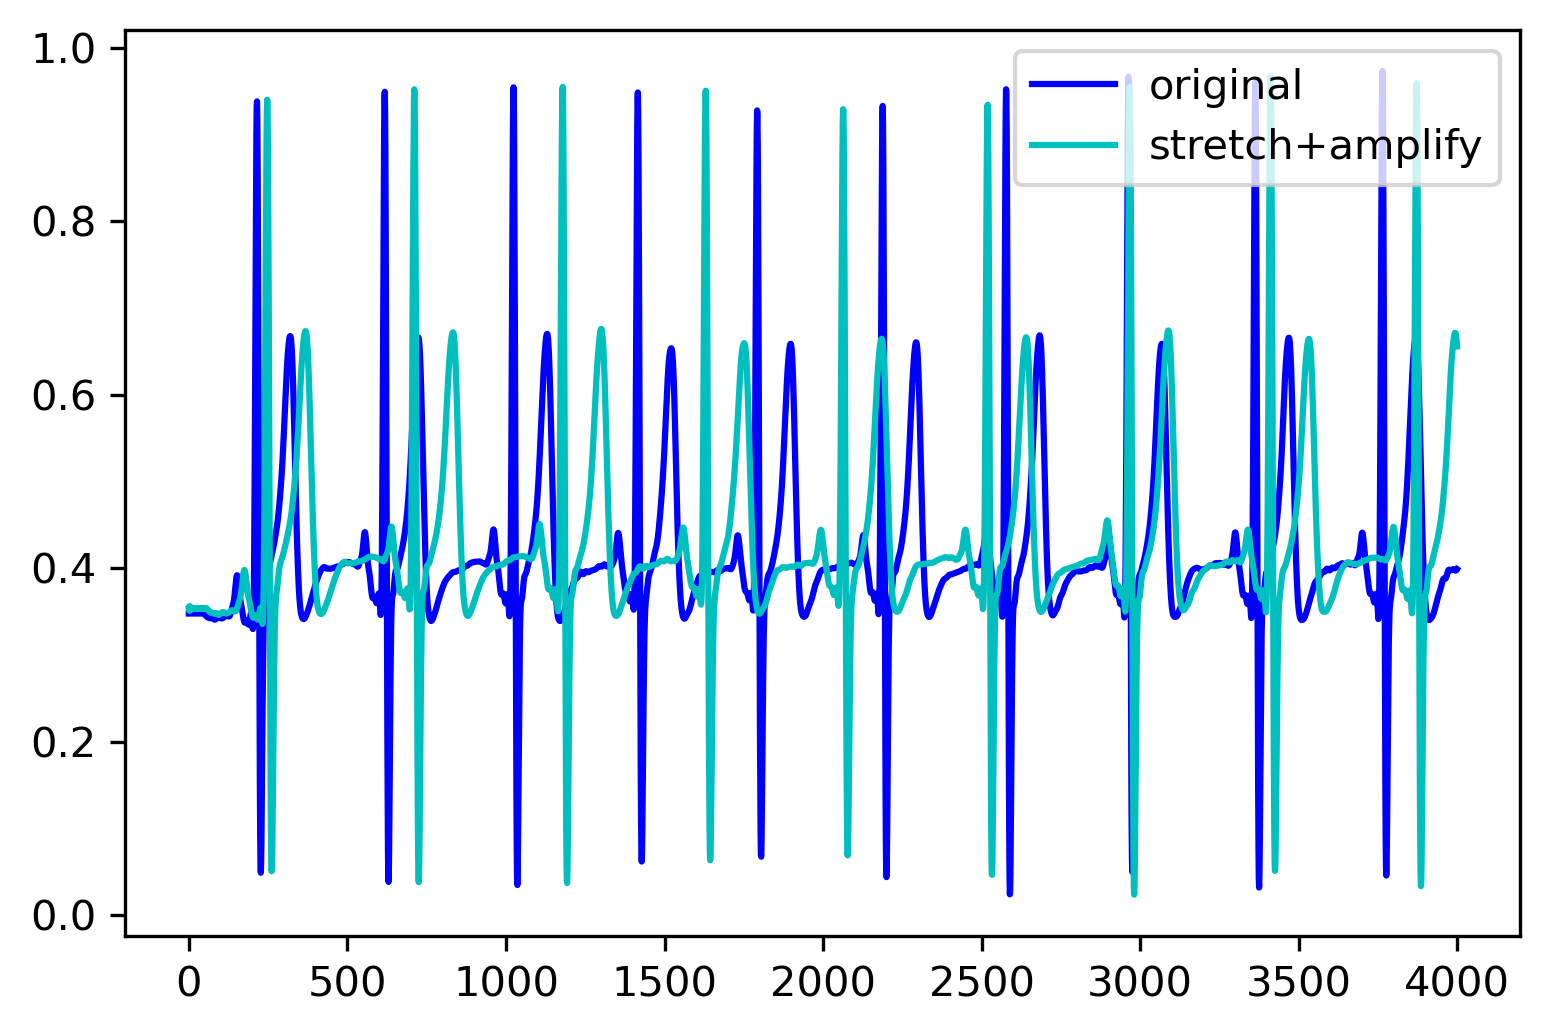

In [55]:
plt.figure(dpi=300)
plt.plot(original_seg, 'b')
plt.plot(combine_seg, 'c')
plt.legend(['original',
           'stretch+amplify'],
           loc="upper right")
plt.show()

In [ ]:
plt.plot(segment[0], 'b')
plt.plot(segment[1], 'g')
plt.plot(segment[2], 'r')
plt.plot(segment[3], 'c')
plt.show()

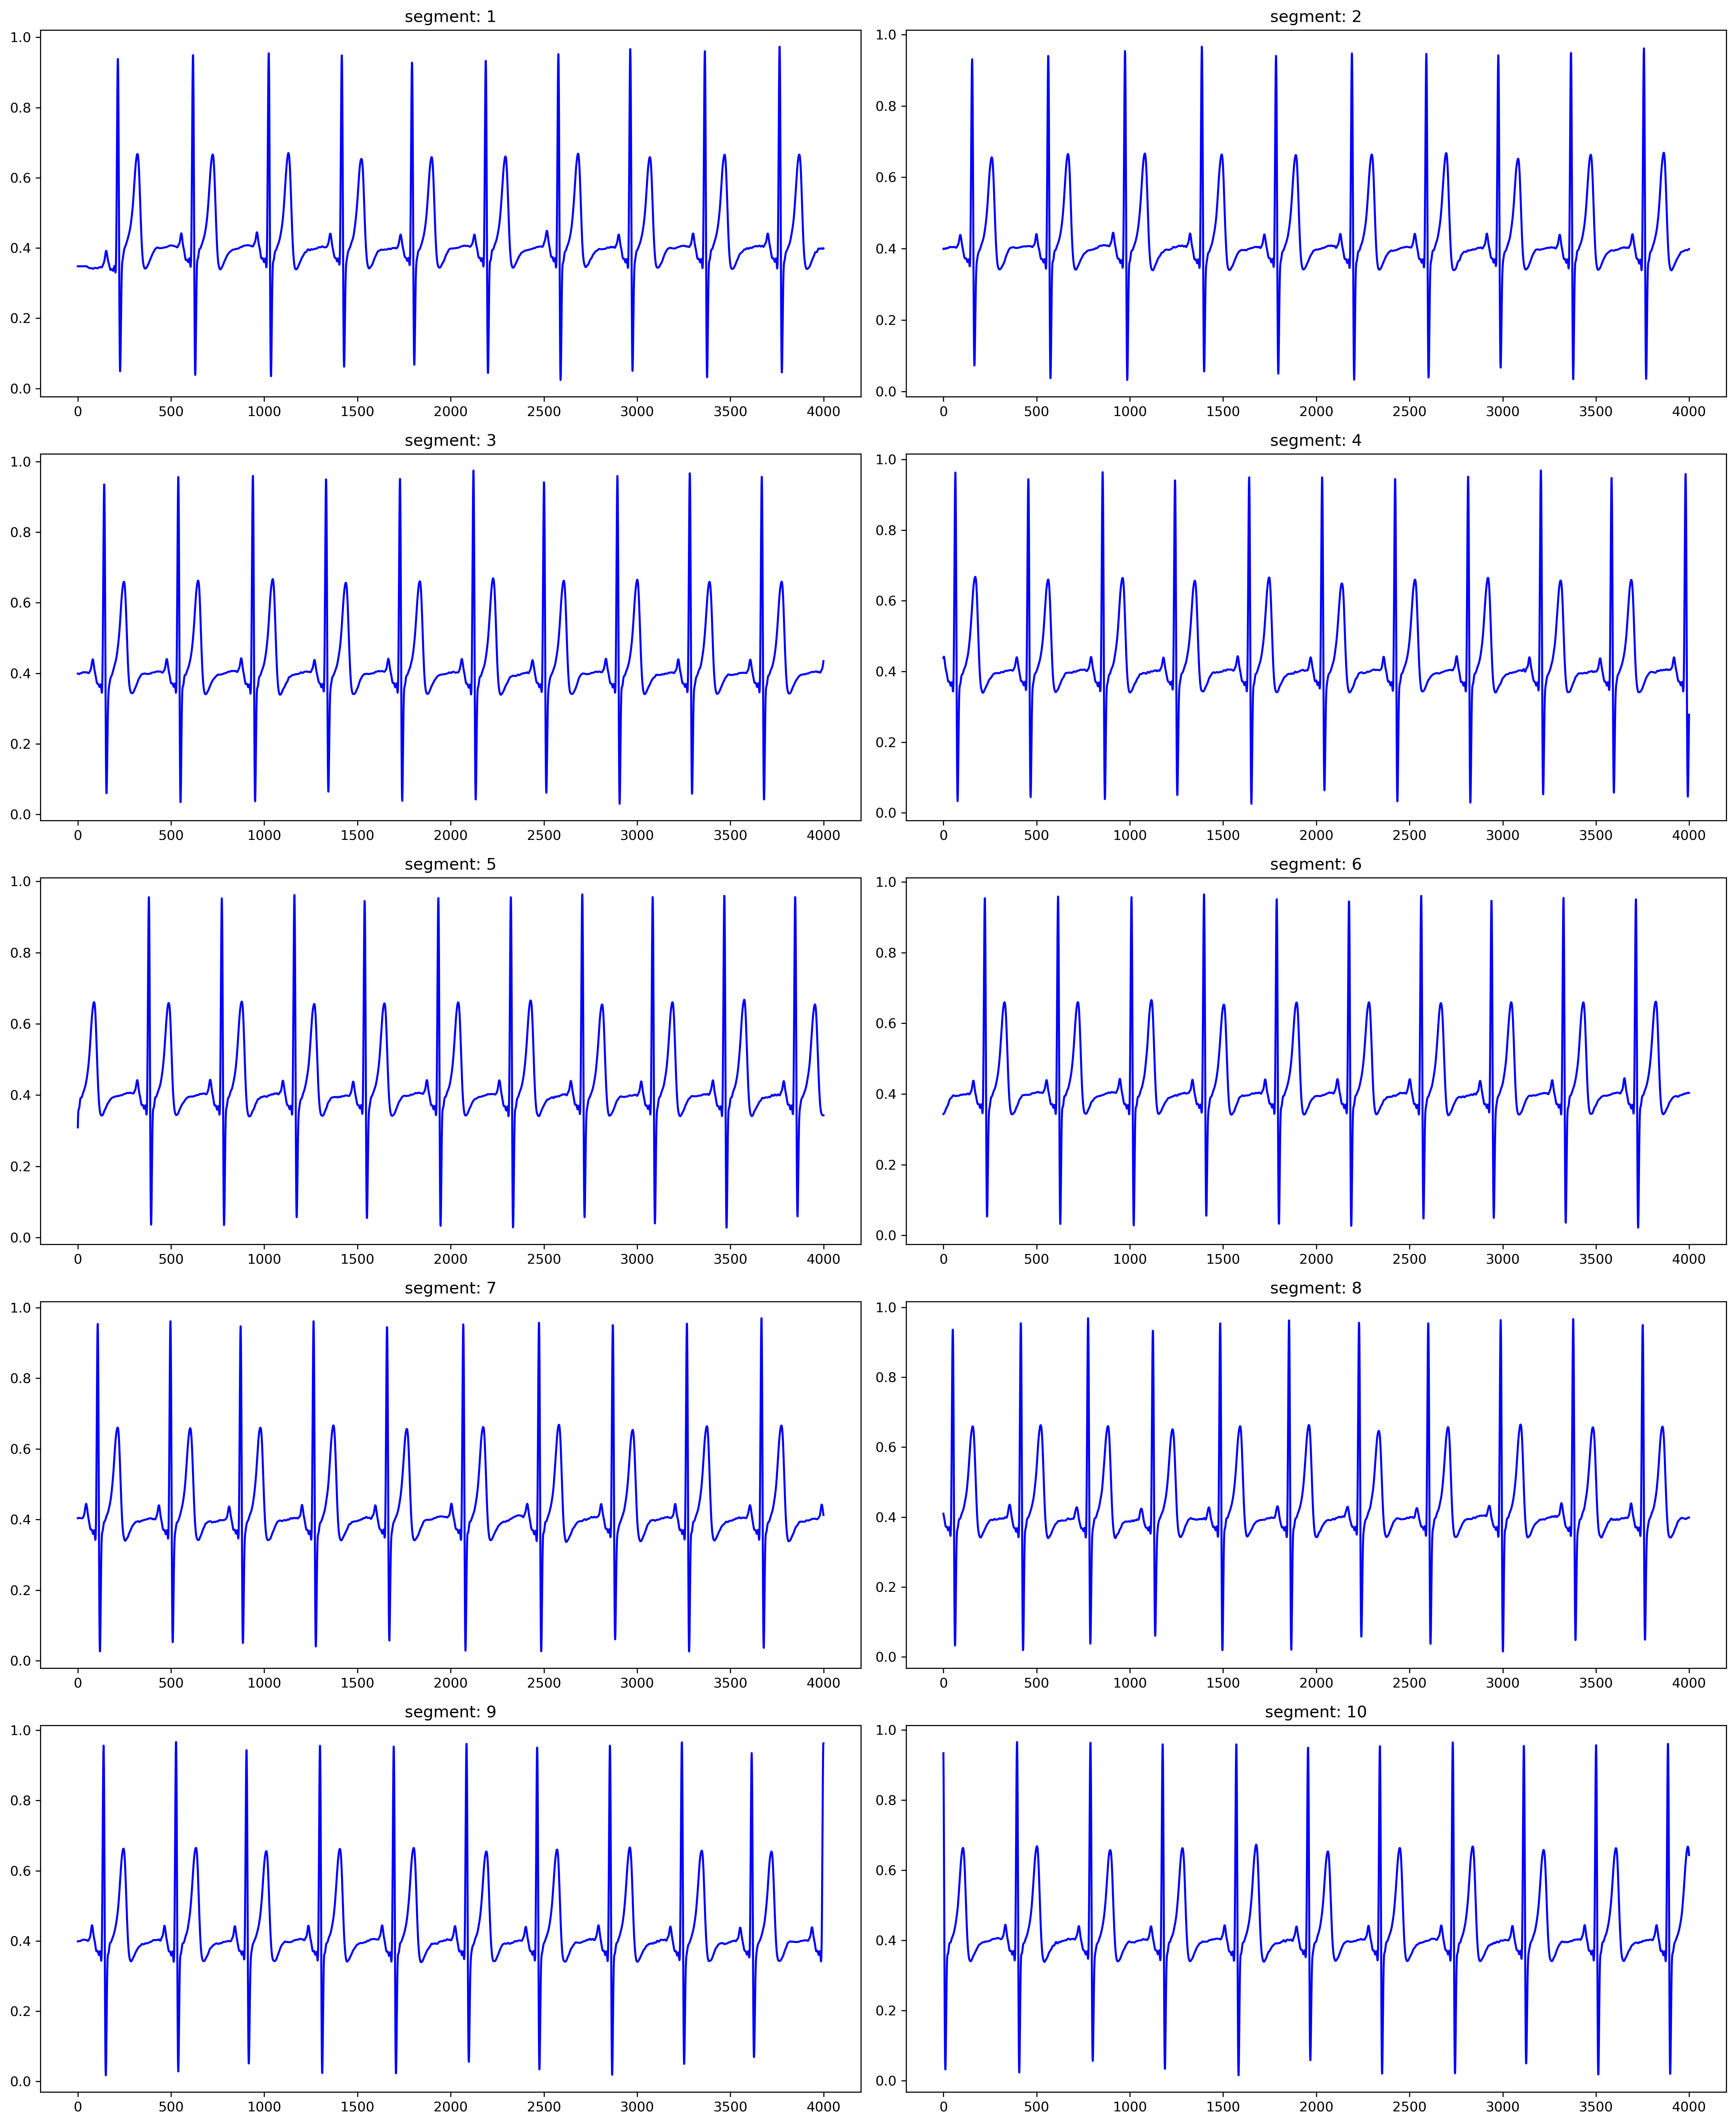

In [10]:
plot_case_segments(segment)

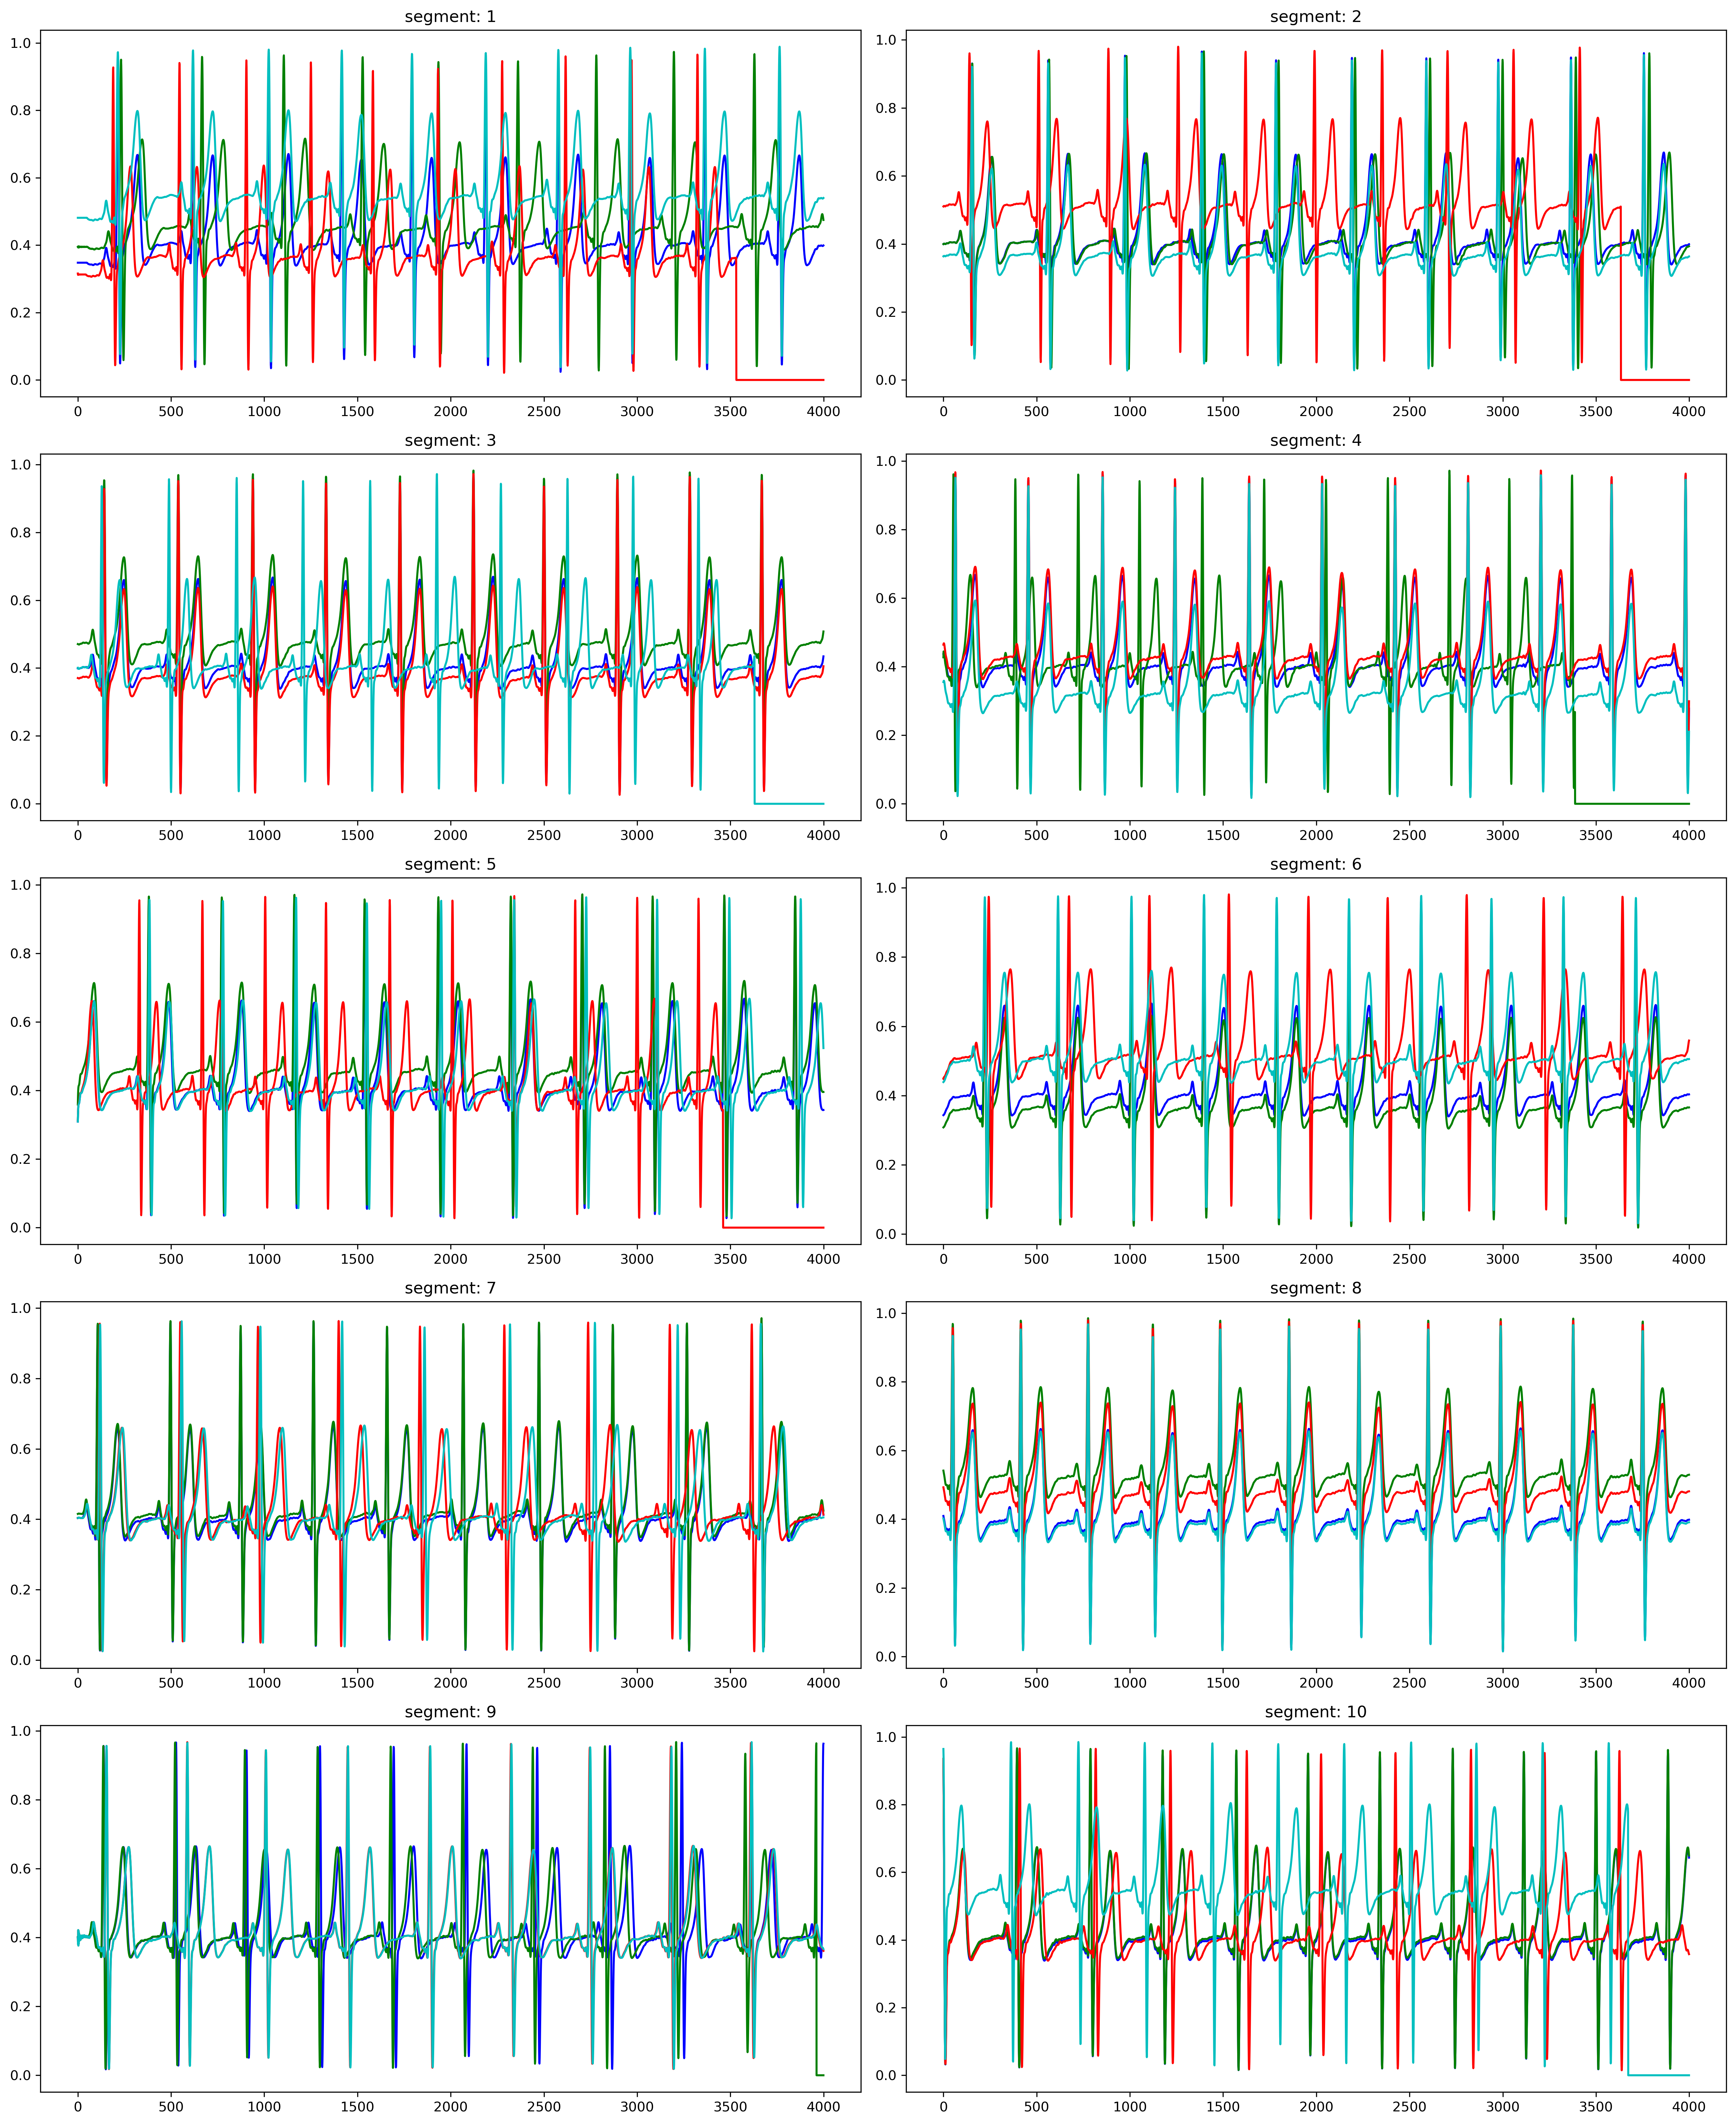

In [11]:
plot_case_segments(segment, augmented=True)

In [12]:
def zero_pad(array, offsets=96):
    """
    array: Array to be padded
    reference: Reference array with the desired shape
    offsets: list of offsets (number of elements must be equal to the dimension of the array)
    """
    output_shape = (len(array), 4096, array.shape[2])
    reference = np.zeros(output_shape)
    result = np.zeros_like(reference)
    
    result[:array.shape[0], offsets:array.shape[1]+offsets, :array.shape[2]] = array
    return result

def reshape_npy(case_data):
    return np.reshape(case_data, (len(case_data), 
                                             case_data.shape[2], 
                                             case_data.shape[1]) )

In [13]:
X_Raw = X[:, 0, :].copy()
X_Raw = np.expand_dims(X_Raw, axis=2)
print(X_Raw.shape)


X_pad = zero_pad(X_Raw, offsets=96)
print(X_pad.shape)

(5695, 4000, 1)
(5695, 4096, 1)


In [14]:
#SEED = 1337
SEED = 2021

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y,
                                                    test_size=0.3, 
                                                  random_state=SEED)
dataset_remark += '_val_size0.3'
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(dataset_remark)

(3986, 4096, 1) (1709, 4096, 1) (3986, 2) (1709, 2)
age_1_val_size0.3


In [15]:
y_train.shape

(3986, 2)

In [16]:
train_df = y_train.argmax(axis=1)
train_df = pd.DataFrame(train_df)
train_df.sample(5)
train_df[0].value_counts()

1    2404
0    1582
Name: 0, dtype: int64

In [17]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced', 
                                                 np.unique(train_df),
                                                 train_df)
print(class_weight)
class_weight_dict = {0:class_weight[0],
                     1:class_weight[1]}
print(class_weight_dict)

dataset_remark += '_classweights'

[1.25979772 0.82903494]
{0: 1.2597977243994942, 1: 0.8290349417637272}


In [18]:
test_df = y_test.argmax(axis=1)
test_df = pd.DataFrame(test_df)
test_df.sample(5)
test_df[0].value_counts()

1    1036
0     673
Name: 0, dtype: int64

In [19]:
from keras.layers import (Input, Conv1D, MaxPooling1D, Dropout,
                          BatchNormalization, Activation, Add,
                          Flatten, Dense)
from keras.models import Model
import numpy as np


class ResidualUnit(object):
    """Residual unit block (unidimensional).
    Parameters
    ----------
    n_samples_out: int
        Number of output samples.
    n_filters_out: int
        Number of output filters.
    kernel_initializer: str, otional
        Initializer for the weights matrices. See Keras initializers. By default it uses
        'he_normal'.
    dropout_rate: float [0, 1), optional
        Dropout rate used in all Dropout layers. Default is 0.8
    kernel_size: int, optional
        Kernel size for convolutional layers. Default is 17.
    preactivation: bool, optional
        When preactivation is true use full preactivation architecture proposed
        in [1]. Otherwise, use architecture proposed in the original ResNet
        paper [2]. By default it is true.
    postactivation_bn: bool, optional
        Defines if you use batch normalization before or after the activation layer (there
        seems to be some advantages in some cases:
        https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md).
        If true, the batch normalization is used before the activation
        function, otherwise the activation comes first, as it is usually done.
        By default it is false.
    activation_function: string, optional
        Keras activation function to be used. By default 'relu'.
    References
    ----------
    .. [1] K. He, X. Zhang, S. Ren, and J. Sun, "Identity Mappings in Deep Residual Networks,"
           arXiv:1603.05027 [cs], Mar. 2016. https://arxiv.org/pdf/1603.05027.pdf.
    .. [2] K. He, X. Zhang, S. Ren, and J. Sun, "Deep Residual Learning for Image Recognition," in 2016 IEEE Conference
           on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 770-778. https://arxiv.org/pdf/1512.03385.pdf
    """

    def __init__(self, n_samples_out, n_filters_out, 
                 kernel_initializer='he_normal',
                 dropout_rate=0.8,
                 kernel_size=17, 
                 preactivation=True,
                 postactivation_bn=False, 
                 activation_function='relu'
                ):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = dropout_rate
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function
        
        print('kernal_size: ', self.kernel_size)

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1]
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2]
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, 
                   kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(rate = self.dropout_rate)(x)
     
    
        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, 
                   strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(rate = self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(rate = self.dropout_rate)(x)
            y = x
        return [x, y]


In [20]:
# ----- Model1 ----- #
num_classes = 2
kernel_size = 16
kernel_initializer = 'he_normal'
input_shape = X_train.shape[1:]
print(input_shape)

#signal = Input(shape=(4096, 12), dtype=np.float32, name='signal')
signal = Input(shape=(input_shape), dtype=np.float32, name='signal')
age_range = Input(shape=(6,), dtype=np.float32, name='age_range')
is_male = Input(shape=(1,), dtype=np.float32, name='is_male')

x = signal
x = Conv1D(64, kernel_size, padding='same', use_bias=False,
           kernel_initializer=kernel_initializer)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x, y = ResidualUnit(1024, 128, kernel_size=kernel_size,
                    kernel_initializer=kernel_initializer)([x, x])
x, y = ResidualUnit(256, 196, kernel_size=kernel_size,
                    kernel_initializer=kernel_initializer)([x, y])
x, y = ResidualUnit(64, 256, kernel_size=kernel_size,
                    kernel_initializer=kernel_initializer)([x, y])
x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,
                    kernel_initializer=kernel_initializer)([x, y])
x = Flatten()(x)
diagn = Dense(num_classes, 
              activation='sigmoid', #original
              #activation='softmax',
              kernel_initializer=kernel_initializer)(x)
model = Model(signal, diagn)
print(dataset_remark)
model.summary()


(4096, 1)
kernal_size:  16
kernal_size:  16
kernal_size:  16
kernal_size:  16
age_1_val_size0.3_classweights
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             [(None, 4096, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 4096, 64)     1024        signal[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4096, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 4096, 64)     0           batch_normal

# training

In [21]:
import sys
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import (ModelCheckpoint,
                             TensorBoard, ReduceLROnPlateau,
                             CSVLogger, EarlyStopping)
#from keras.backend.tensorflow_backend import set_session
from keras.models import Model
import argparse
#from keras.utils import HDF5Matrix
import pandas as pd
import h5py
import numpy as np

import datetime

In [22]:
print(tf.__version__)
print(tf.test.gpu_device_name())
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
#set_session(tf.Session(config=config))

2.3.0
/device:GPU:0


In [23]:
# Optimization settings
loss = 'binary_crossentropy'
lr = 0.001
batch_size = 8
validation_split = 0.1
opt = Adam(lr)

reLR = ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=7,
                               min_lr=lr / 100)
        
early_stop = EarlyStopping(patience=9,  # Patience should be larger than the one in ReduceLROnPlateau
                           min_delta=0.00001)


In [24]:
# Create log
# tensorboard = TensorBoard(log_dir='./logs', 
#                           #batch_size=batch_size, 
#                           write_graph=False) 
#csvlogger = CSVLogger('training.log', append=False)  # Change append to true if continuing training
# Save the BEST and LAST model
#backup_model_last = f'backup_model_weight_last_{epochs}ep.hdf5'

epochs = 100

backup_model_best = f'backup_model_{dataset_remark}_{epochs}ep.hdf5'
#mcp1 = ModelCheckpoint(backup_model_last)
mcp2 = ModelCheckpoint(backup_model_best, save_best_only=True)

final_model = f"final_model_{dataset_remark}_{epochs}ep.hdf5"

print(backup_model_best)
#print(final_model)

# from keras_tqdm import TQDMNotebookCallback
# tqdm_callback = TQDMNotebookCallback(leave_inner=False, leave_outer=True)

import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)

# from tqdm.keras import TqdmCallback
# tqdm_cb = TqdmCallback(verbose=2)

from livelossplot import PlotLossesKeras

callbacks = [reLR,
             #early_stop,
             #tensorboard,
             #csvlogger,
             #mcp1,
             mcp2,
             tqdm_callback,
             PlotLossesKeras()
            ]

# If you are continuing an interrupted section, uncomment line bellow:
#   model = keras.models.load_model(PATH_TO_PREV_MODEL, compile=False)
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

backup_model_age_1_val_size0.3_classweights_100ep.hdf5


In [25]:
class_weight_dict

{0: 1.2597977243994942, 1: 0.8290349417637272}

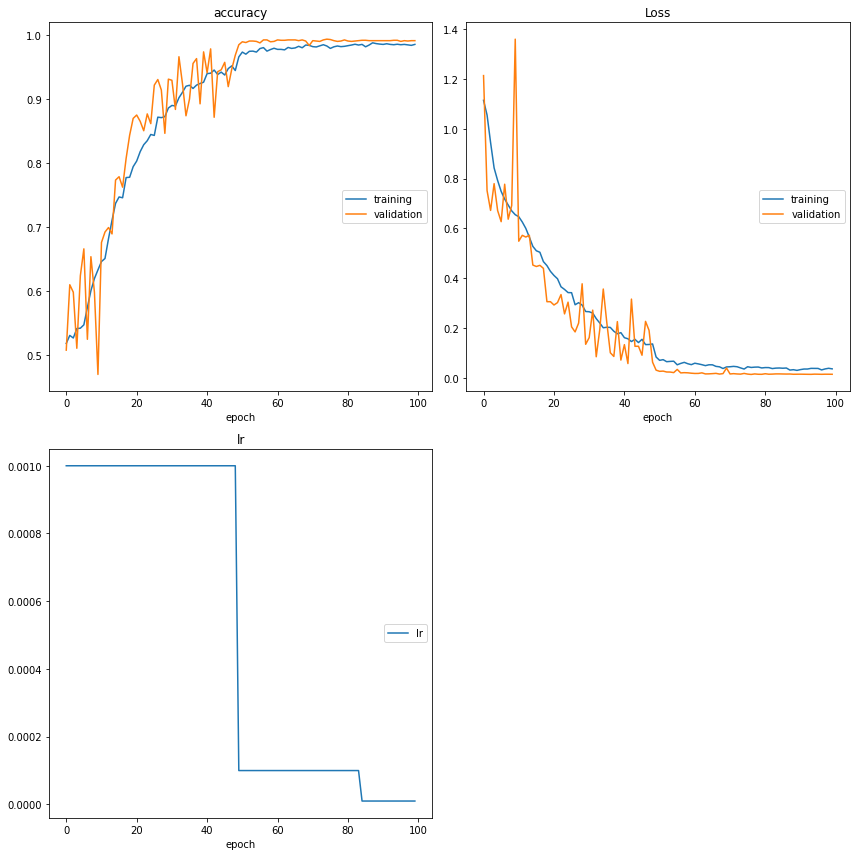

accuracy
	training         	 (min:    0.518, max:    0.988, cur:    0.986)
	validation       	 (min:    0.469, max:    0.994, cur:    0.992)
Loss
	training         	 (min:    0.029, max:    1.114, cur:    0.036)
	validation       	 (min:    0.013, max:    1.360, cur:    0.014)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)
499/499 - 293s - loss: 0.0355 - accuracy: 0.9860 - val_loss: 0.0138 - val_accuracy: 0.9918
Training time:  7:21:54.638794


In [26]:
# Train neural network
t1 = datetime.datetime.now()

with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        class_weight=class_weight_dict,
                        initial_epoch=0,  # If you are continuing a interrupted section change here
                        #validation_split=validation_split,
                        validation_data=(X_test, y_test),
                        #shuffle='batch',  # Because our dataset is an HDF5 file
                        callbacks=callbacks,
                        verbose=2)

t2 = datetime.datetime.now() - t1

print("Training time: ", t2)


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [28]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()
    
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()

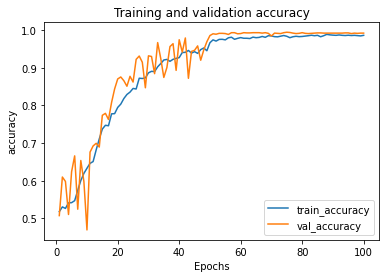

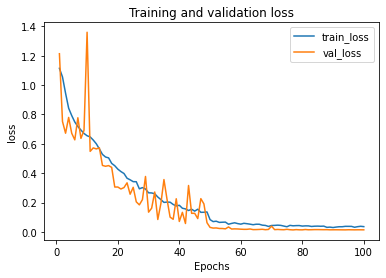

In [29]:
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

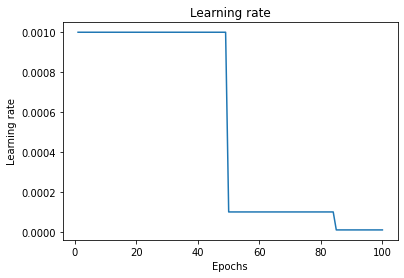

In [30]:
plot_lr(history)

In [31]:
#model = keras.models.load_model(model_save)


test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

54/54 [==============================] - 13s 247ms/step - loss: 0.0138 - accuracy: 0.9918
Test accuracy 0.9918080568313599
Test loss 0.013806143775582314


In [32]:
model.load_weights(backup_model_best)

In [33]:
y_pred = model.predict(X_test, batch_size=batch_size)
y_pred.shape

(1709, 2)

In [34]:
y_test.shape

(1709, 2)

In [35]:
y_true = y_test.argmax(axis=1)
y_hat = y_pred.argmax(axis=1)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       673
           1       0.99      1.00      0.99      1036

    accuracy                           0.99      1709
   macro avg       0.99      0.99      0.99      1709
weighted avg       0.99      0.99      0.99      1709



In [37]:
from sklearn import metrics


print('f1_score weighted {:.4}'.format(metrics.f1_score(y_true, y_hat,
                                            average='weighted',
                                            labels=np.unique(y_hat))))
print('f1-score micro {:.4}'.format(metrics.f1_score(y_true, y_hat,
                                             average='micro', 
                                             labels=np.unique(y_hat))))
print('f1-score macro {:.4}'.format(metrics.f1_score(y_true, y_hat,
                                             average='macro',
                                             labels=np.unique(y_hat))))
print('ACC {:.4}'.format(metrics.accuracy_score(y_true, y_hat)))
print('Cohen_Kappa {:.4}'.format(metrics.cohen_kappa_score(y_true, y_hat)))

f1_score weighted 0.9918
f1-score micro 0.9918
f1-score macro 0.9914
ACC 0.9918
Cohen_Kappa 0.9828


In [38]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(y_true, y_hat)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 664    9]
 [   5 1031]]
acc: 0.9918
sensitivity: 0.9866
specificity: 0.9952


Text(0.5, -9.19387621270354, 'Predicted label\naccuracy=0.9918\n misclass=0.0082')

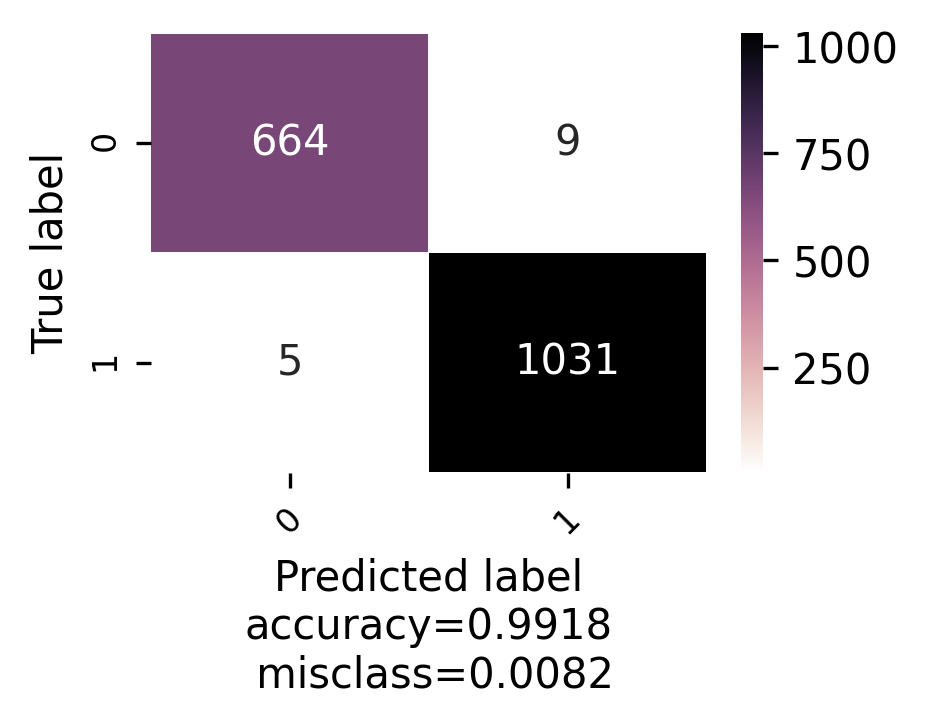

In [39]:
target_names = ['0', '1']
plt.figure(figsize=(3, 2), dpi=300)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45, fontsize=8)
plt.yticks(tick_marks, target_names, fontsize=8)

#sns.set(font_scale=1.4)
cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
ax = sns.heatmap(cm, annot=True,
                 cbar=True,
                 fmt='d', 
                 linewidths=.05,
                 xticklabels=target_names,
                 yticklabels=target_names,
                 cmap=cmap
                )

plt.tight_layout()
plt.ylabel('True label', fontsize=10)
plt.xlabel("Predicted label\naccuracy={:0.4f}\n misclass={:0.4f}".format(accuracy, misclass),
          fontsize=10)

Text(0.5, -9.19387621270354, 'Predicted label\naccuracy=0.9918\n misclass=0.0082')

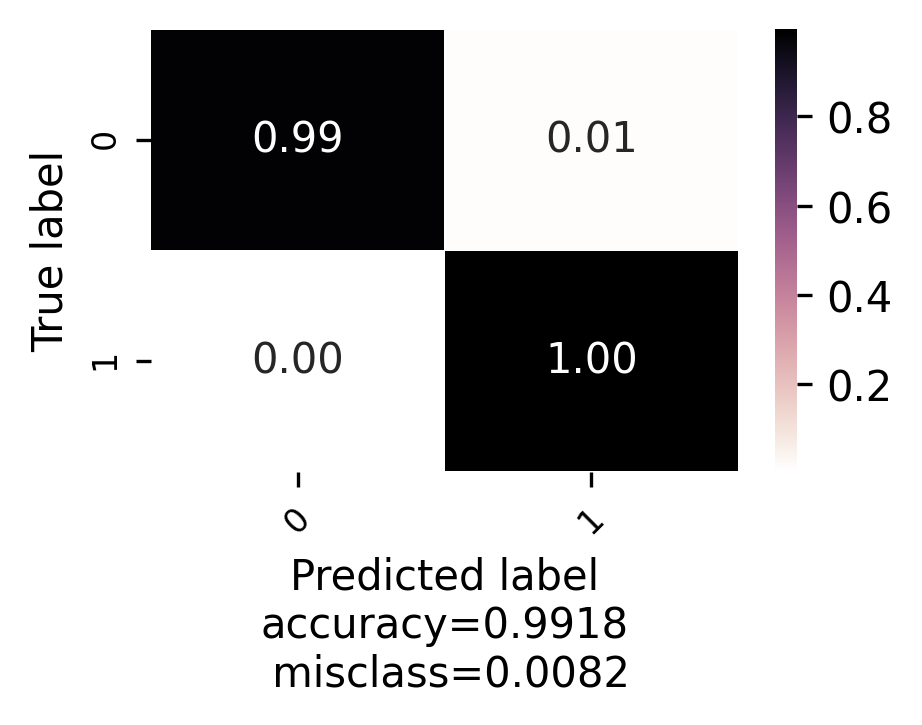

In [40]:
plt.figure(figsize=(3, 2), dpi=300)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45, fontsize=8)
plt.yticks(tick_marks, target_names, fontsize=8)

#sns.set(font_scale=1.4)
cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
cm_nor = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm_nor, annot=True,
                 cbar=True,
                 fmt='.2f', 
                 linewidths=.05,
                 xticklabels=target_names,
                 yticklabels=target_names,
                 cmap=cmap
                )

plt.tight_layout()
plt.ylabel('True label', fontsize=10)
plt.xlabel("Predicted label\naccuracy={:0.4f}\n misclass={:0.4f}".format(accuracy, misclass),
          fontsize=10)

(1709, 2) (1709, 2)


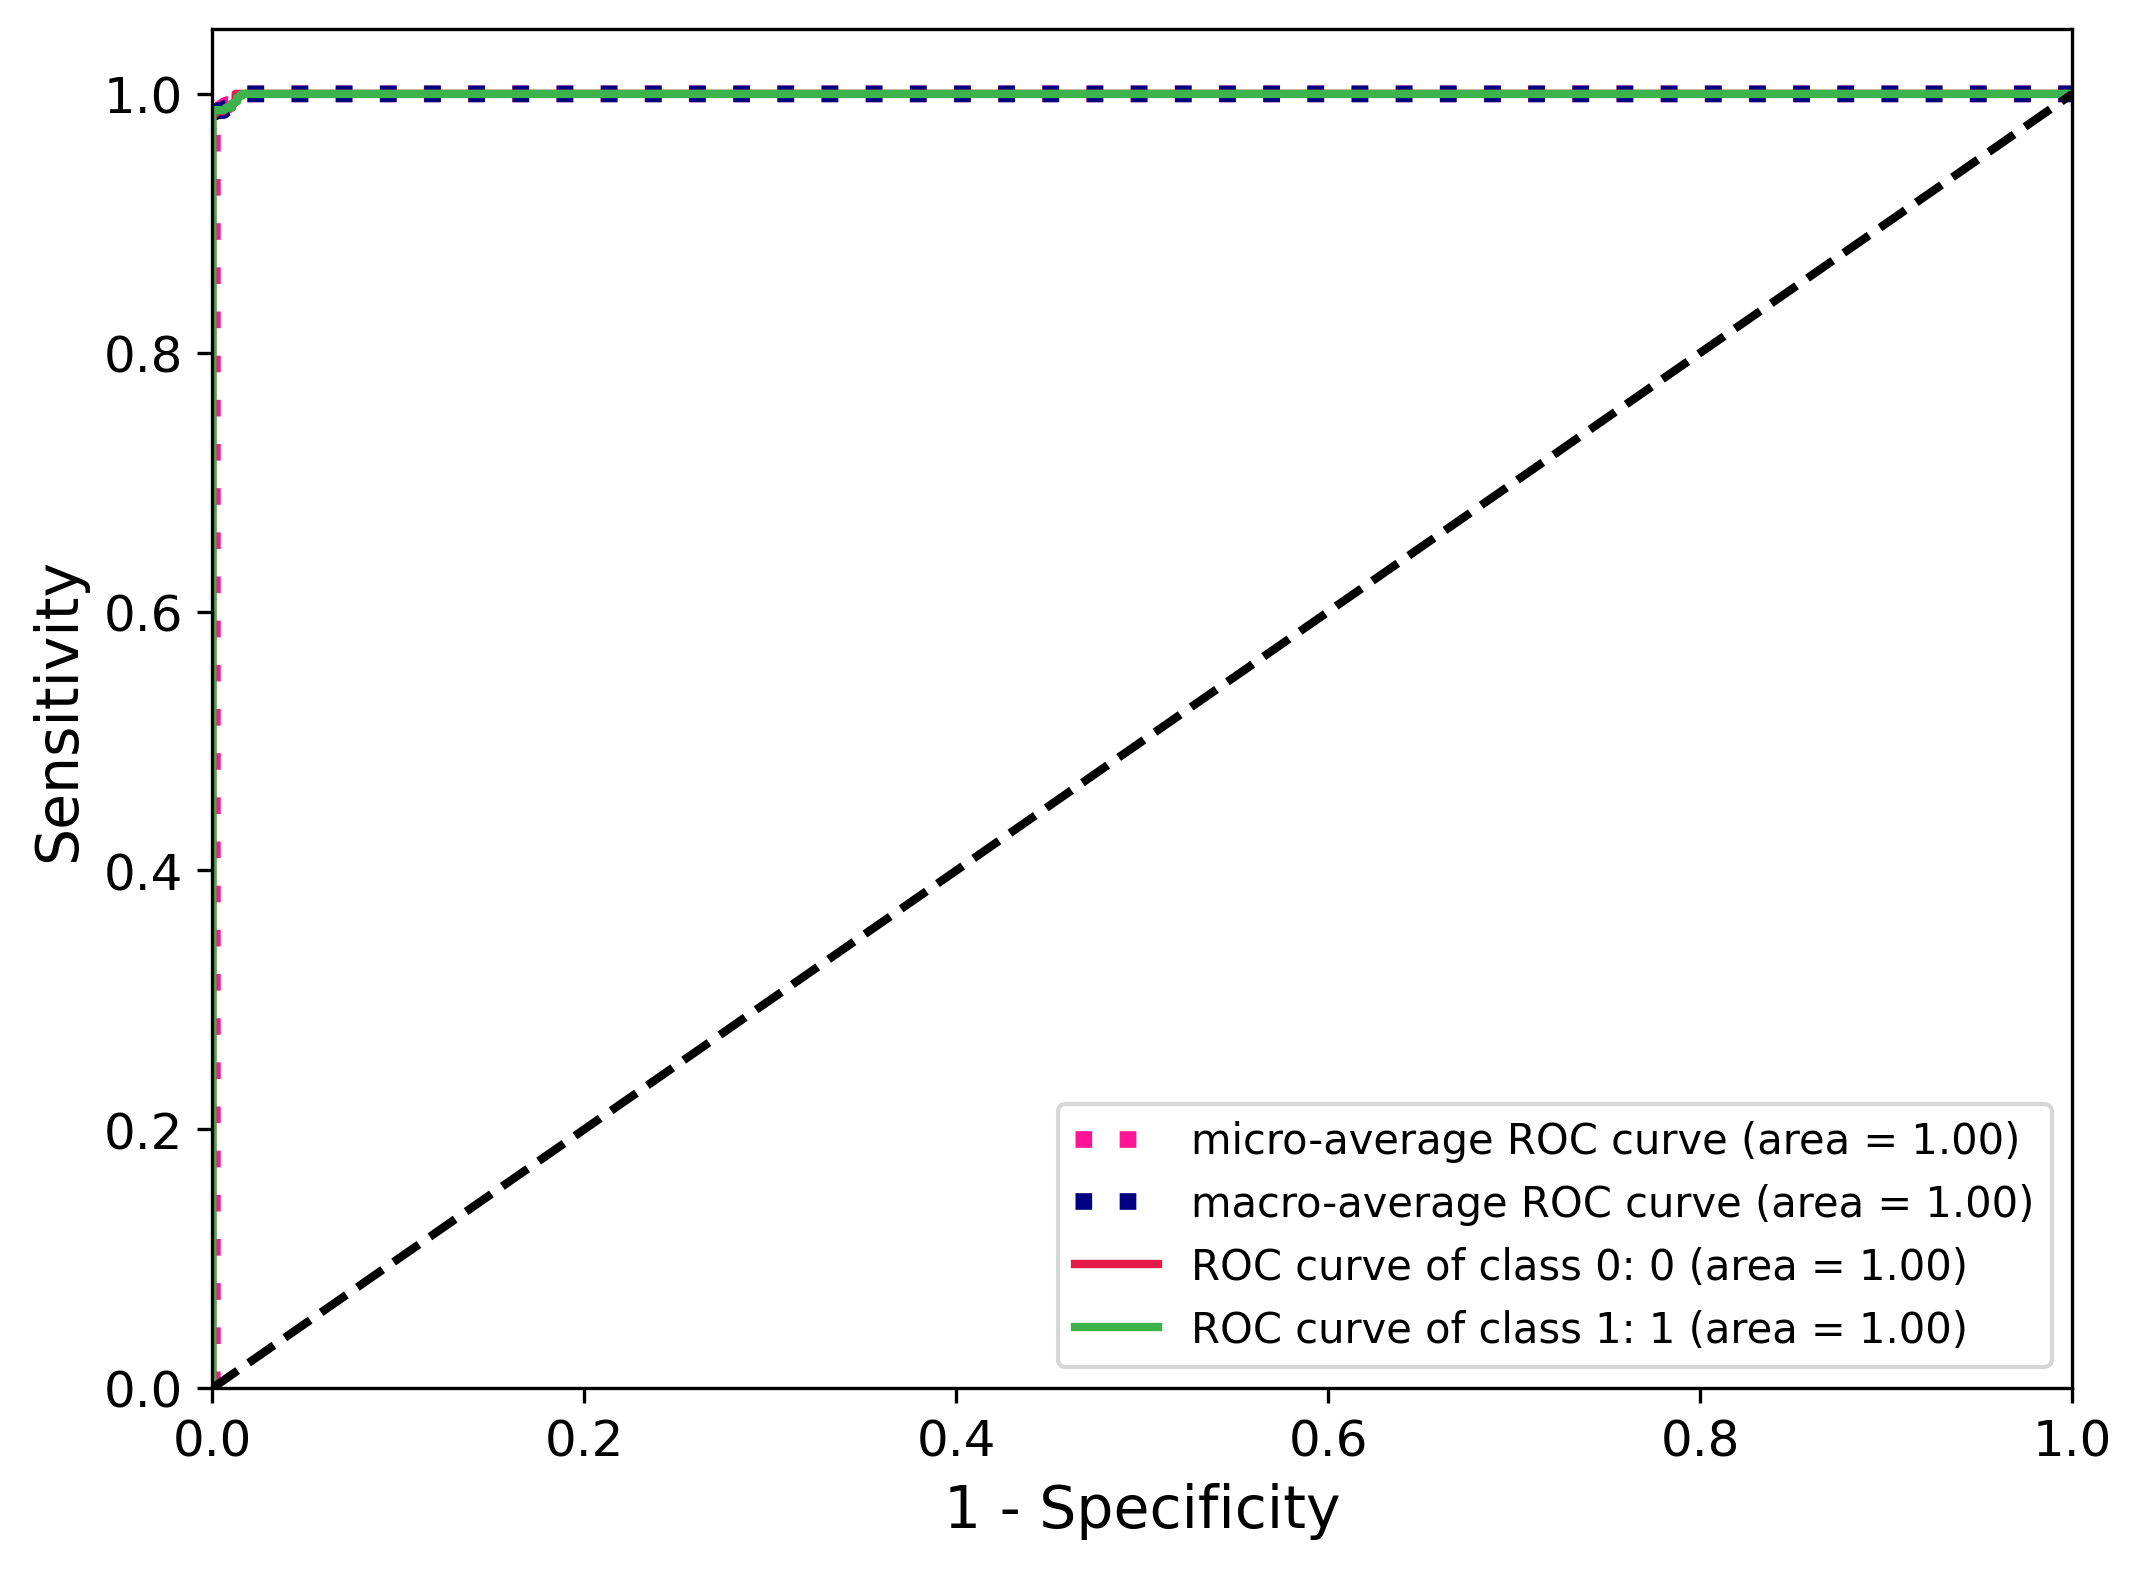

In [41]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure

# #main object: y_score, y_test
# print("[INFO] evaluating network...")

# with tf.device('/device:GPU:0'):
#     Y_score = model.predict(X_test,
#                             steps=1,
#                             verbose=1)
    
    
# print(Y_score.shape)
Y_score = y_pred.copy()
Y_test = y_test.copy()
print(Y_test.shape, Y_score.shape)

# Plot linewidth
lw = 2
n_classes = num_classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
#plt.figure
plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

#colors = cycle(['aqua', 'darkorange', 'cornflowerblue',
#               'red', 'darkgoldenrod', 'darkgreen',
#               'darkmagenta', 'navy', 'firebrick', 'rosybrown'])

colors = cycle(['#e6194B', '#3cb44b', 'cornflowerblue']) #red and green

for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {}: {} (area = {:.2f})'
                     ''.format(i, target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity', fontsize=14)
plt.ylabel('Sensitivity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Receiver operating characteristic to multi-class', fontsize=16)
#plt.legend(loc="lower right")
plt.legend(#lines, labels, 
            #loc=(0, -0.6),
            #loc='best'
            #prop=dict(size=12), 
            loc="lower right"
            )
plt.show()

In [42]:
model.load_weights(backup_model_best)
print(backup_model_best, "loaded")

backup_model_age_1_val_size0.3_classweights_100ep.hdf5 loaded
